In [4]:
import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score

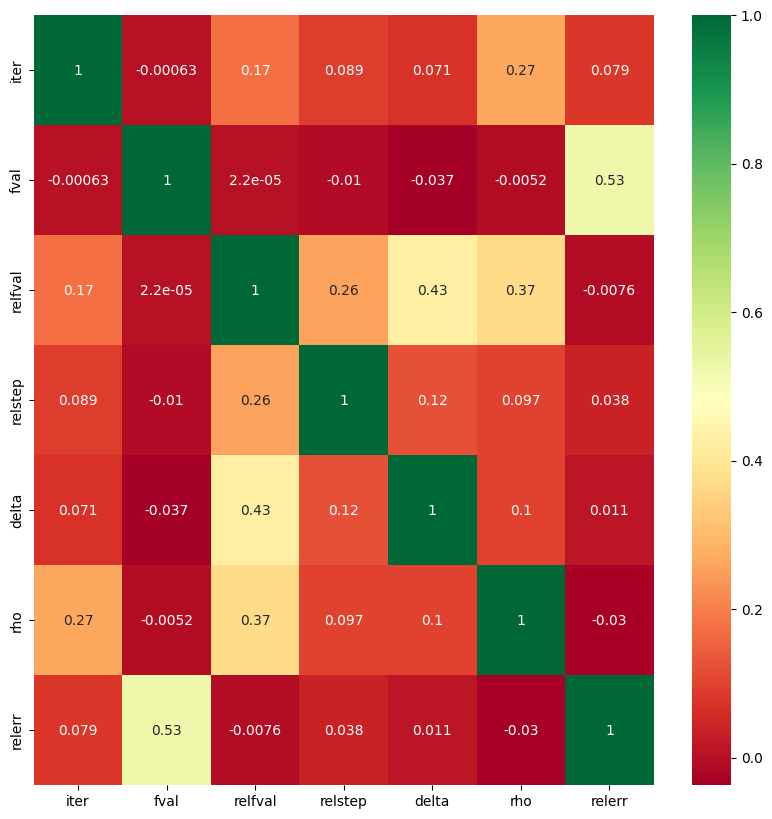

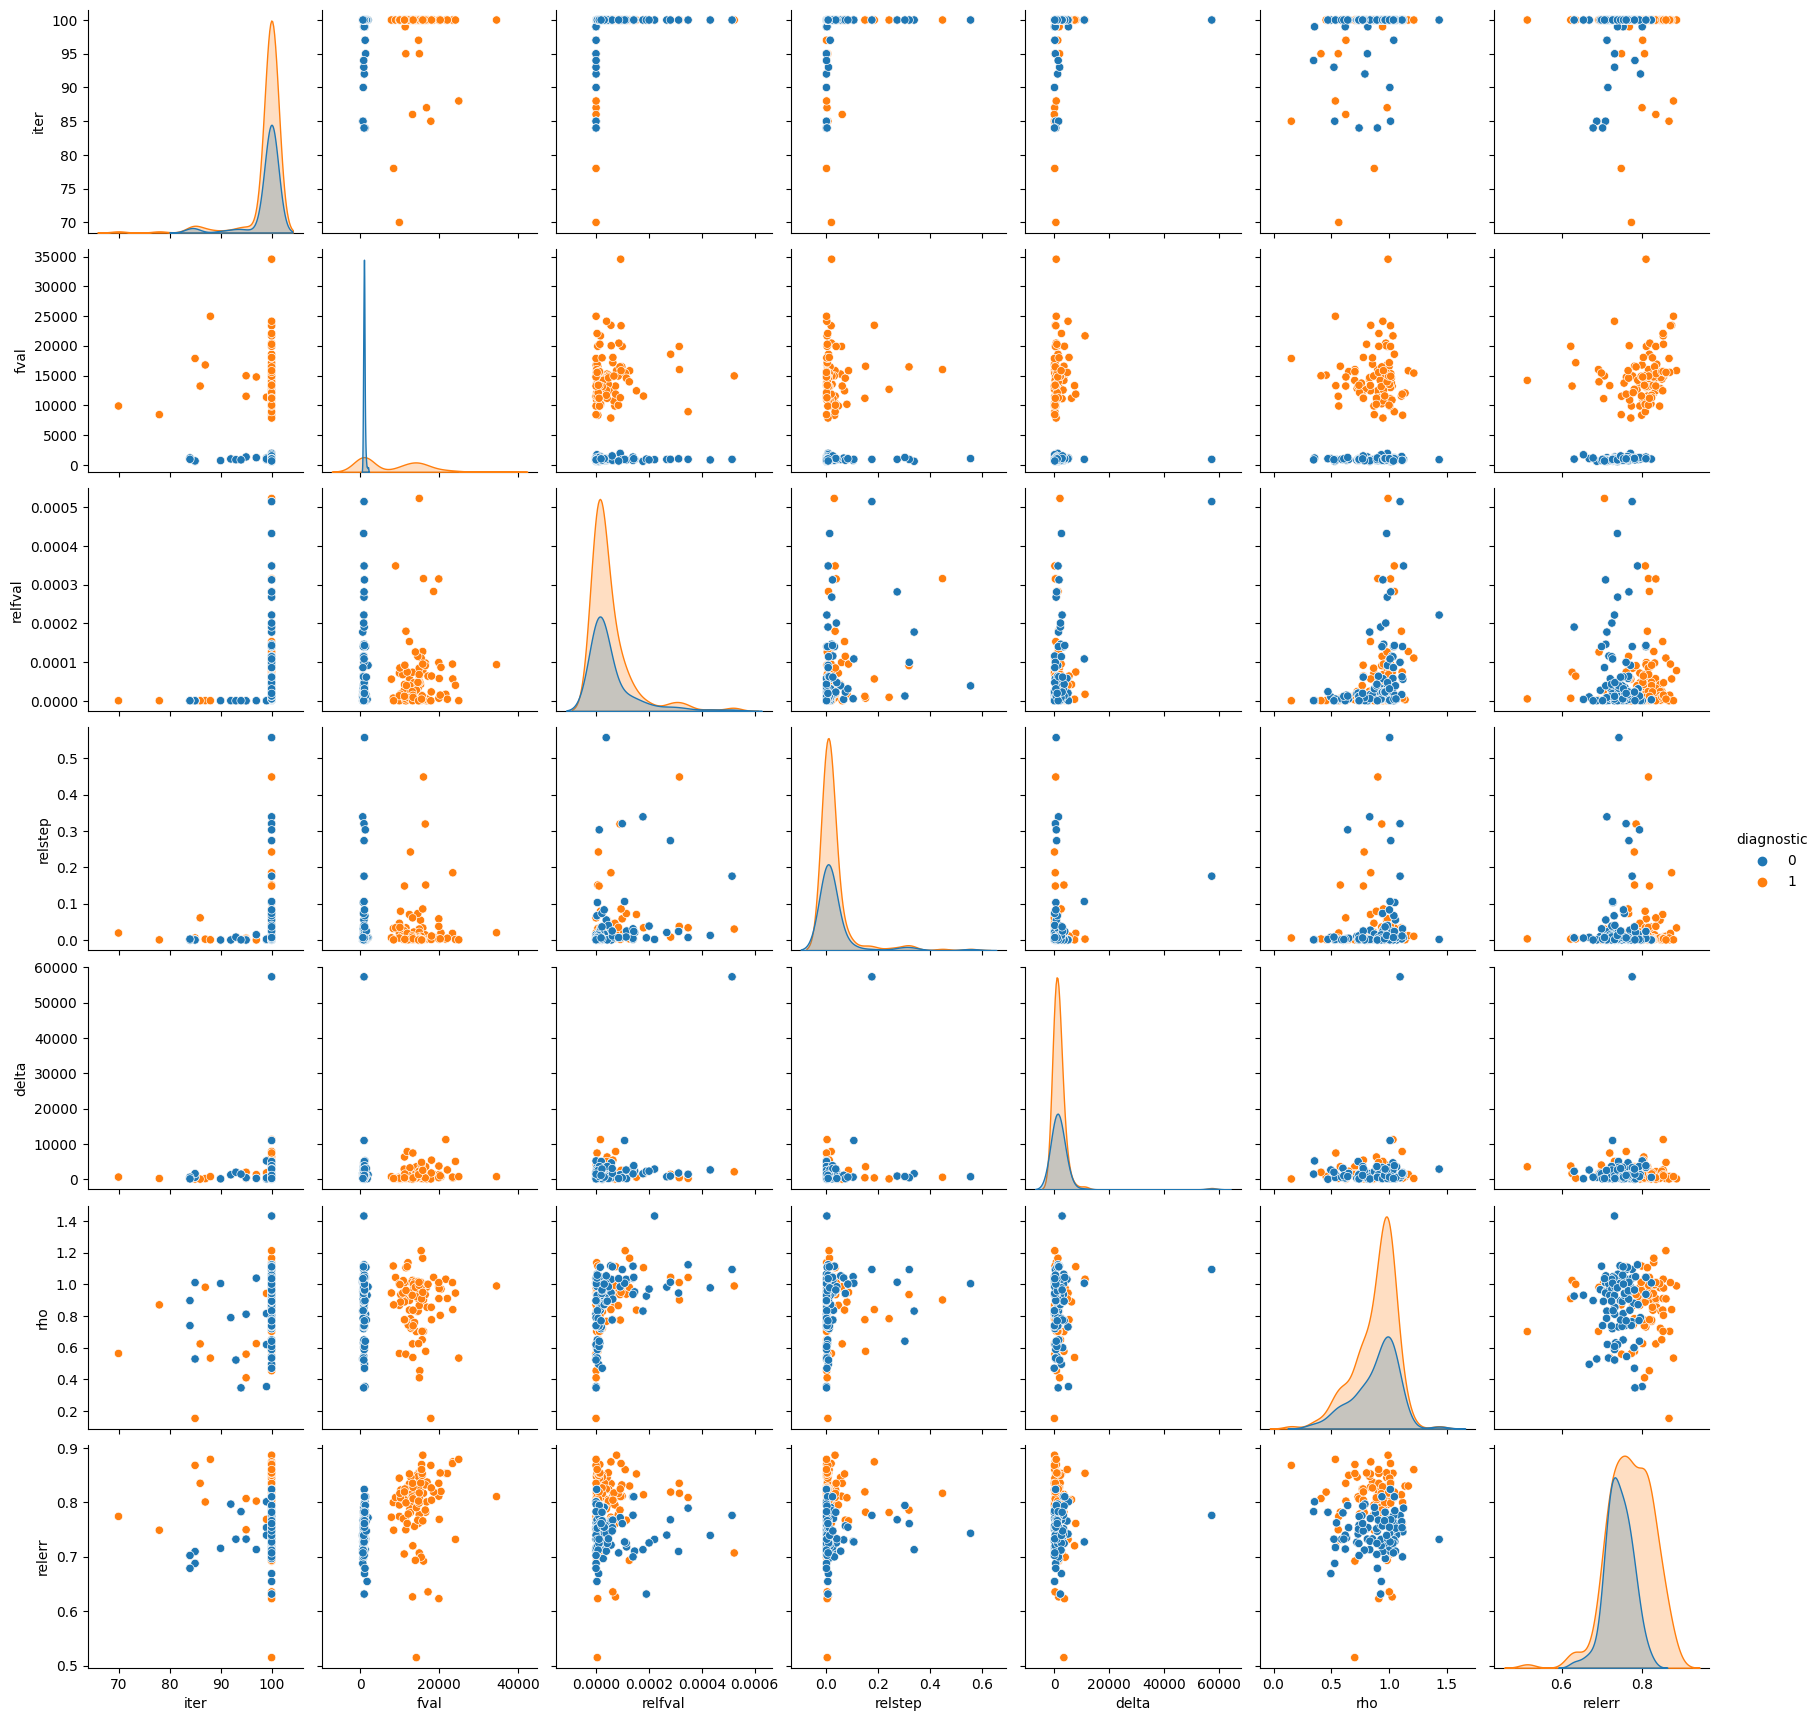

In [5]:
base_df = pd.read_csv("./samples/results.csv")
base_df = base_df[base_df["rank"] == 5]
# base_df = base_df[base_df['db'] == 'WFDB_ChapmanShaoxing']

X_df = base_df[["iter", "fval", "relfval", "relstep", "delta", "rho", "relerr"]]
X = X_df.to_numpy()
corrmat = X_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
sns.heatmap(X_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

y_df = base_df[["diagnostic"]]
y = y_df["diagnostic"].to_numpy()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y_df["diagnostic"] = y
sns.pairplot(pd.concat([X_df, y_df], axis=1), hue="diagnostic")

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
clf = MLPClassifier(
    activation="tanh",
    alpha=0.005,
    early_stopping=False,
    hidden_layer_sizes=(300, 30),
    learning_rate="adaptive",
    learning_rate_init=0.001,
    max_iter=1000,
    solver="adam",
)

In [7]:
kfold = StratifiedKFold(n_splits=5)

0.5433333333333333


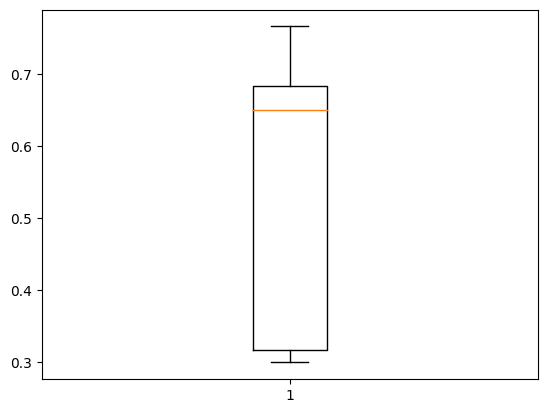

In [8]:
cv_results = cross_val_score(clf, X, y, cv=kfold, scoring="accuracy")
print(f"{cv_results.mean()}")
plt.boxplot(cv_results)
plt.show()